<a href="https://colab.research.google.com/github/akshitachhabra2717/gdp-dashboard/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/titanic.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.isnull().sum() #finding missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [9]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Fare"].fillna(df["Fare"].median(),inplace=True)#Filling missing values


/tmp/ipython-input-9-3312617809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)
/tmp/ipython-input-9-3312617809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [10]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [11]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [12]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [13]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [14]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode())

In [15]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [16]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


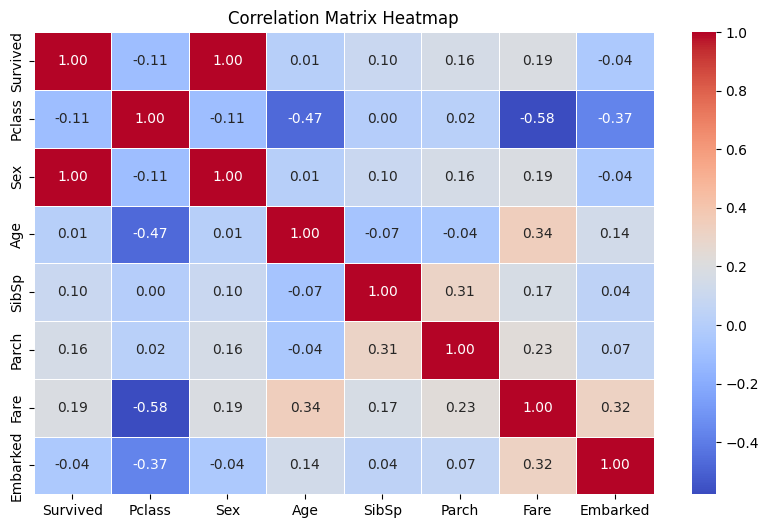

In [17]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

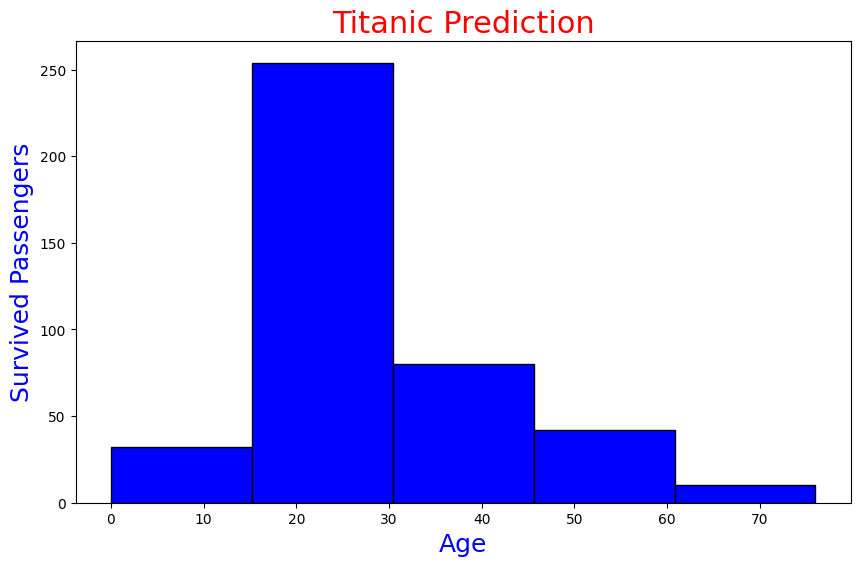

In [18]:
# Histogram Chart -
plt.figure(figsize=(10,6))
plt.hist(df["Age"],bins=5,color="blue",edgecolor="black")
plt.title("Titanic Prediction",color="red",fontsize=22)
plt.xlabel("Age",color="blue",fontsize=18)
plt.ylabel("Survived Passengers",color="blue",fontsize=18)
plt.show()

/tmp/ipython-input-19-801362083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Survived", y="Age", data=df, estimator='mean', palette="viridis")


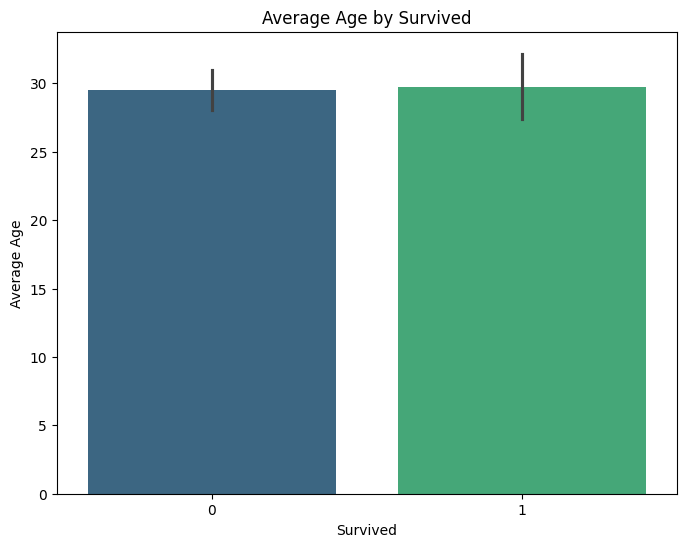

<Figure size 640x480 with 0 Axes>

In [19]:
#Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="Survived", y="Age", data=df, estimator='mean', palette="viridis")

plt.title("Average Age by Survived")
plt.xlabel("Survived")
plt.ylabel("Average Age")
plt.show()
plt.tight_layout()
plt.show()

#Outliers

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
...,...,...,...,...,...,...,...,...
413,0,3,0,27,0,0,8,1
414,1,1,1,39,0,0,108,2
415,0,3,0,38,0,0,7,1
416,0,3,0,27,0,0,8,1


In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,29.574163,0.447368,0.392344,35.133971,1.133971
std,0.481622,0.841838,0.481622,12.721533,0.896760,0.981429,55.855855,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


In [22]:
def detect_outlier(data,col):
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)

  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  return data[(data[col]>=lower) & (data[col]<=upper)]
Outliers_age=detect_outlier(df,"Age")

In [23]:
Outliers_age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
5,0,3,0,14,0,0,9,1
...,...,...,...,...,...,...,...,...
413,0,3,0,27,0,0,8,1
414,1,1,1,39,0,0,108,2
415,0,3,0,38,0,0,7,1
416,0,3,0,27,0,0,8,1


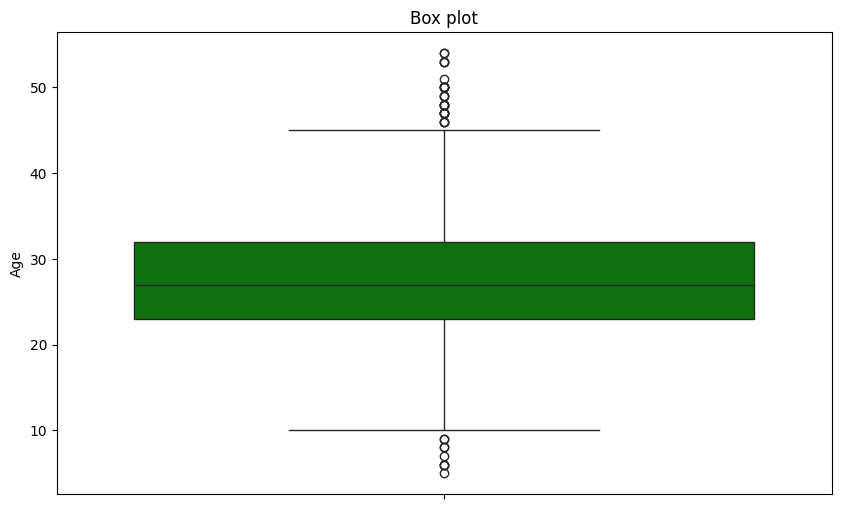

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(y=Outliers_age["Age"],color="green")
plt.title("Box plot")
plt.show()

In [25]:
def detect_outlier(data,col):
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)

  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  return data[(data[col]<lower) | (data[col]>upper)]
Outliers_age=detect_outlier(df,"Age")

In [26]:
Outliers_age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,0,2,0,62,0,0,9,0
13,0,2,0,63,1,0,26,1
20,0,1,0,55,1,0,59,2
48,1,1,1,60,0,0,76,2
69,1,1,1,60,1,4,263,1
77,1,1,1,55,2,0,25,1
81,0,1,0,67,1,0,221,1
89,0,2,0,2,1,1,23,1
96,1,1,1,76,1,0,78,1
114,1,1,1,63,1,0,221,1


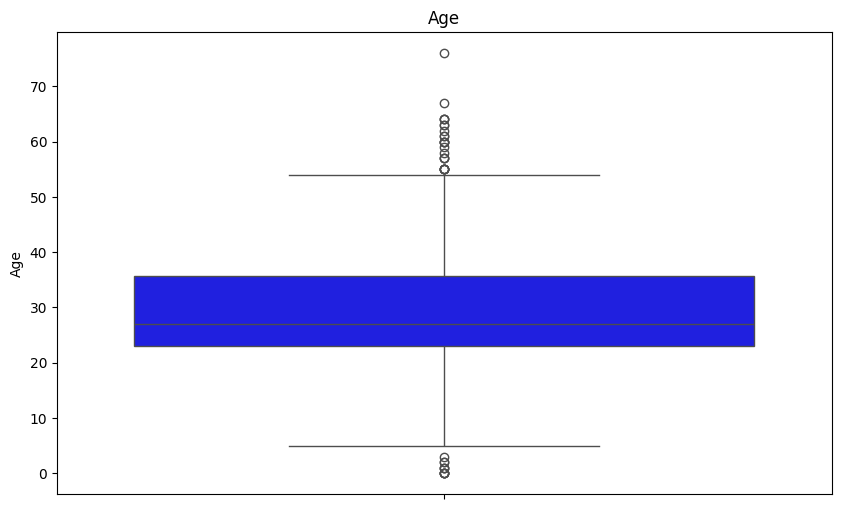

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(df,y="Age",color="Blue")
plt.title("Age")
plt.show()

#Feature Selection

In [28]:
#Feature selection
x=df.drop('Survived',axis=1)
y=df['Survived']

In [29]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
#feature scaling
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_train_scale=scaler.fit_transform(x_train)
#x_test_scale=scaler.transform(x_test)

#Model Selection

In [31]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred=lr_model.predict(x_test) #evaluation
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [35]:
from sklearn.metrics import accuracy_score #accuracy
Accuracy=accuracy_score(y_test,y_pred)
print(Accuracy*100)

100.0


In [61]:
print(y_test.value_counts())

Survived
0    50
1    34
Name: count, dtype: int64


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
df_model=DecisionTreeClassifier()
df_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred1=df_model.predict(x_test)
print(y_pred1)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [53]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred1)
print(Accuracy*100)

100.0


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred2=rf_model.predict(x_test)
print(y_pred2)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [57]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred2)
print(Accuracy*100)

100.0


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [58]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [59]:
y_pred3=svm_model.predict(x_test)
print(y_pred3)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0]


In [60]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred3)
print(Accuracy*100)

60.71428571428571


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75        50
           1       0.67      0.06      0.11        34

    accuracy                           0.61        84
   macro avg       0.64      0.52      0.43        84
weighted avg       0.63      0.61      0.49        84

